In [5]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt

In [6]:
DATA_PREFIX = "data: "


def parse_chunk(chunk):
    lines = chunk.strip().split("\n")
    assert len(lines) == 2
    assert lines[0] == "event: braid"
    assert lines[1].startswith(DATA_PREFIX)
    buf = lines[1][len(DATA_PREFIX) :]
    data = json.loads(buf)
    return data

0.23878023891690625


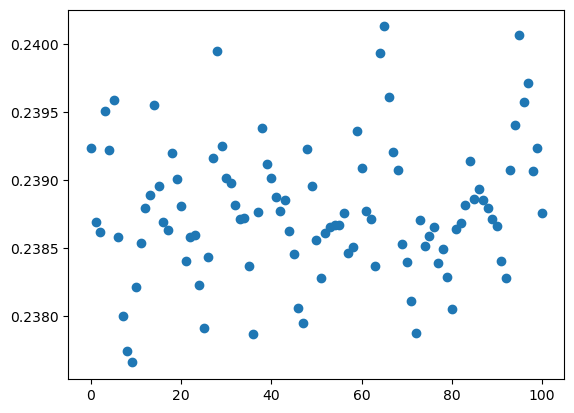

In [18]:
braid_url = "http://127.0.0.1:8397/"
events_url = f"{braid_url}/events"
session = requests.Session()
r = session.get(braid_url)
assert r.status_code == requests.codes.ok

r = session.get(events_url, stream=True, headers={"Accept": "text/event-stream"})

i = 0
zs = []

for chunk in r.iter_content(chunk_size=None, decode_unicode=True):
    if i > 100:
        break

    data = parse_chunk(chunk)
    try:
        z = data["msg"]["Update"]["z"]
        zs.append(z)
        i += 1
    except:
        pass
print(np.nanmean(zs))

fig = plt.figure()
plt.scatter(range(len(zs)), zs)
plt.show()

0.0564161622585523
